In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mikoajfish99/lions-or-cheetahs-image-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ahmed\.cache\kagglehub\datasets\mikoajfish99\lions-or-cheetahs-image-classification\versions\1


In [2]:
ls $path

 Volume in drive C is OS
 Volume Serial Number is 26AB-FD03

 Directory of C:\Users\ahmed\.cache\kagglehub\datasets\mikoajfish99\lions-or-cheetahs-image-classification\versions\1

04-05-2025  10:09 PM    <DIR>          .
04-05-2025  10:09 PM    <DIR>          ..
04-05-2025  10:09 PM    <DIR>          images
               0 File(s)              0 bytes
               3 Dir(s)  136,823,582,720 bytes free


In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data, test_data = image_dataset_from_directory(
    path + '/images',
    subset='both',
    validation_split=0.3,
    seed=10
)

Found 200 files belonging to 2 classes.
Using 140 files for training.
Using 60 files for validation.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [5]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPool2D((2, 2)),
    Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_data, epochs=2)

Epoch 1/2
5/5 [==============================] - 8s 262ms/step - loss: 394.7569 - accuracy: 0.4929
Epoch 2/2
5/5 [==============================] - 1s 141ms/step - loss: 0.6931 - accuracy: 0.5071


In [8]:
history.history['accuracy']

[0.4928571283817291, 0.5071428418159485]

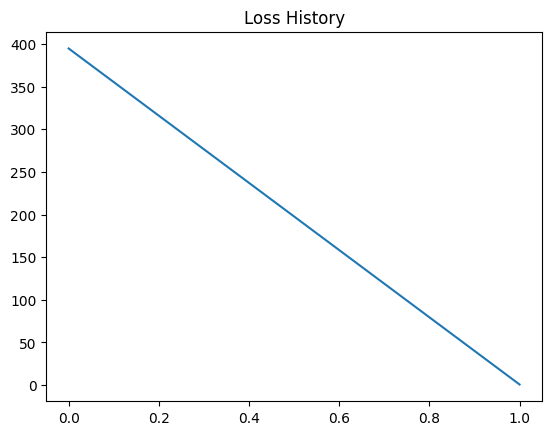

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.title("Loss History")
plt.show()

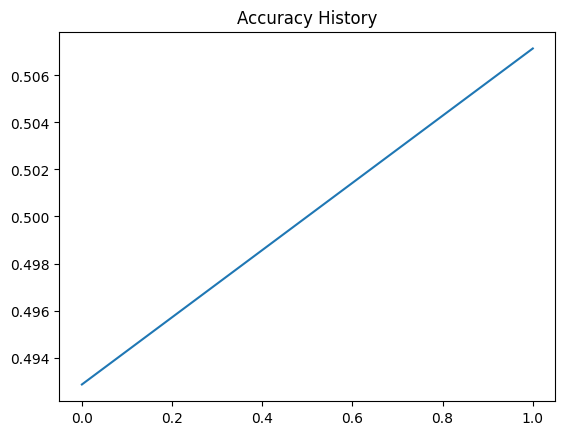

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='accuracy')
plt.title("Accuracy History")
plt.show()

In [11]:
images = []
labels = []

for image_batch, label_batch in test_data:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())


In [12]:
preds = model.predict(test_data)

2/2 [==============================] - 1s 624ms/step


In [13]:
import numpy as np
preds = np.round(preds)
preds

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [14]:
preds = preds.reshape(60)
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(labels, preds) * 100 , "%")

48.333333333333336 %


In [16]:
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        29
           1       0.00      0.00      0.00        31

    accuracy                           0.48        60
   macro avg       0.24      0.50      0.33        60
weighted avg       0.23      0.48      0.31        60



c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


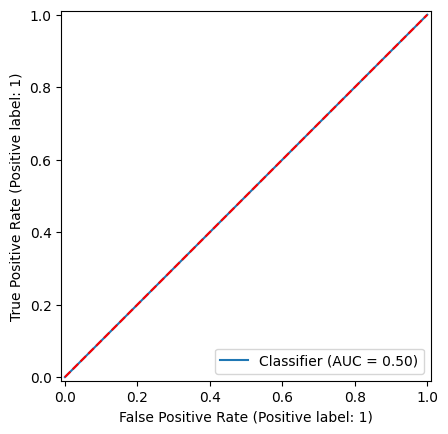

In [17]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt # Ensure matplotlib is imported if not already done in a previous cell run order
import numpy as np # Ensure numpy is imported


# Plot the ROC curve using the true labels and the predicted scores
RocCurveDisplay.from_predictions(
    labels,
    preds
)
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.show() # Add plt.show() to display the plot

class 1 is in index 0  
class 0 is in index 1

In [18]:
training_images = [images[0], images[1]]
training_labels = [labels[0], labels[1]]

model.fit(np.array(training_images), np.array(training_labels), epochs=2)

Epoch 1/2
1/1 [==============================] - 0s 184ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/2
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000
